In [51]:
from utils import *
np.random.seed(42)
random.seed(42)

In [3]:
df = pd.read_csv("Project1-Classification.csv")

Question 1

In [4]:
print(f"# of rows(samples): {df.shape[0]}")
print(f"# of columns(features): {df.shape[1]}")

# of rows(samples): 3150
# of columns(features): 8


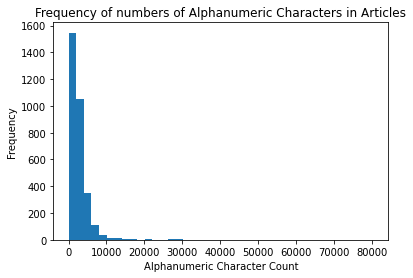

In [5]:
df["alphanum_counts"]=df["full_text"].apply(count_alphanum)
hist1 = plt.figure()
plt.hist(df["alphanum_counts"], bins=40)
plt.title("Frequency of numbers of Alphanumeric Characters in Articles")
plt.xlabel("Alphanumeric Character Count")
plt.ylabel("Frequency")
#plt.xlim([0,40000])
plt.show()

In [6]:
df = df.replace({'%22forest%20fire%22': 'forest fire'}, regex=True)


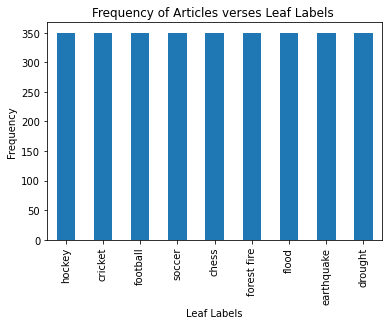

In [7]:
hist2 = plt.figure()
df['leaf_label'].value_counts().plot(kind='bar')
plt.title("Frequency of Articles verses Leaf Labels ")
plt.xlabel("Leaf Labels")
plt.ylabel("Frequency")
plt.show()

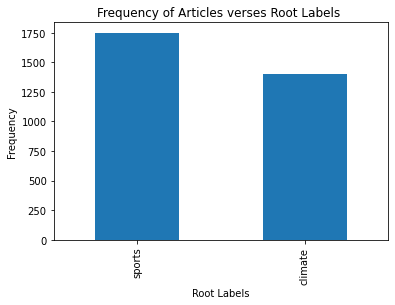

In [8]:
hist3 = plt.figure()
df['root_label'].value_counts().plot(kind='bar')
plt.title("Frequency of Articles verses Root Labels ")
plt.xlabel("Root Labels")
plt.ylabel("Frequency")
plt.show()

Question 2

In [17]:
train, test = train_test_split(df[["full_text","root_label","leaf_label"]], test_size=0.2, random_state=42)
# train['full_text'] = train['full_text'].apply(clean)
train['full_text'] = train['full_text'].apply(nltk.word_tokenize)
# test['full_text'] = test['full_text'].apply(clean)
test['full_text'] = test['full_text'].apply(nltk.word_tokenize)

In [30]:
print(f"# of training samples: {len(train)}")
print(f"# of testing samples: {len(test)}")

# of training samples: 2520
# of testing samples: 630


Question 3

In [18]:
lemmatizer = WordNetLemmatizer()
vectorizer = TfidfVectorizer(stop_words='english',min_df=3,token_pattern="[^\W\d_]+")
lemmaTemp = []
lemmaTemp2 = []
for article in train["full_text"]:
    lemmaTemp.append(' '.join(lemmatizer.lemmatize(word) for word in article))
train['full_text'] = lemmaTemp
for article in test["full_text"]:
    lemmaTemp2.append(' '.join(lemmatizer.lemmatize(word) for word in article))
test['full_text'] = lemmaTemp2

In [19]:
train['full_text']=train['full_text'].apply(remove_digits_punctuation)
test['full_text']=test['full_text'].apply(remove_digits_punctuation)

In [22]:
vectorizedTrain = vectorizer.fit_transform(lemmaTemp)
vectorizedTest = vectorizer.transform(lemmaTemp2)
print(vectorizedTrain.shape)

(2520, 15761)


Question 4

In [28]:
topic_counts =  [1, 10, 50, 100, 200, 500, 1000, 2000]
reduced_list = []
explained_vars = []
for i, topic_count in enumerate(topic_counts):
    reduced, explained_var = lsi(vectorizedTrain.toarray(), vectorizedTest.toarray(), topic_count)
    reduced_list.append(reduced)
    #not sure if this is the correct explained variance score
    explained_vars.append(explained_var)

reduced: <class 'numpy.ndarray'> of shape: (630, 1)
test: <class 'numpy.ndarray'> of shape: (630, 15761)
0.006167715458740138
reduced: <class 'numpy.ndarray'> of shape: (630, 10)
test: <class 'numpy.ndarray'> of shape: (630, 15761)
0.1520752902113531
reduced: <class 'numpy.ndarray'> of shape: (630, 50)
test: <class 'numpy.ndarray'> of shape: (630, 15761)
0.3073635299469865
reduced: <class 'numpy.ndarray'> of shape: (630, 100)
test: <class 'numpy.ndarray'> of shape: (630, 15761)
0.39453442133088695
reduced: <class 'numpy.ndarray'> of shape: (630, 200)
test: <class 'numpy.ndarray'> of shape: (630, 15761)
0.5037313120818097
reduced: <class 'numpy.ndarray'> of shape: (630, 500)
test: <class 'numpy.ndarray'> of shape: (630, 15761)
0.6955022448433676
reduced: <class 'numpy.ndarray'> of shape: (630, 1000)
test: <class 'numpy.ndarray'> of shape: (630, 15761)
0.8704657213763992
reduced: <class 'numpy.ndarray'> of shape: (630, 2000)
test: <class 'numpy.ndarray'> of shape: (630, 15761)
0.99999145

Text(0, 0.5, 'Explained Variance')

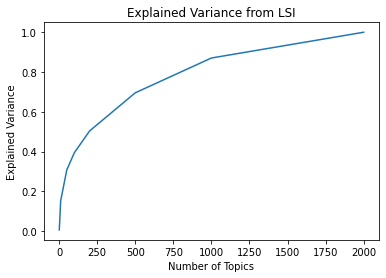

In [29]:
lsi_var_plot = plt.figure()
plt.plot(topic_counts, explained_vars)
plt.title("Explained Variance from LSI")
plt.xlabel("Number of Topics")
plt.ylabel("Explained Variance")

In [31]:
model = TruncatedSVD(n_components=50, random_state=42)
trainedRed = model.fit_transform(vectorizedTrain)
testRed = model.transform(vectorizedTest)

Question 5

Accuracy: 0.9619047619047619
Recall: 0.973384030418251
Precision: 0.9377289377289377
F1 Score: 0.9552238805970149
changed


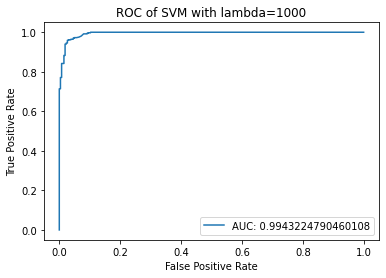

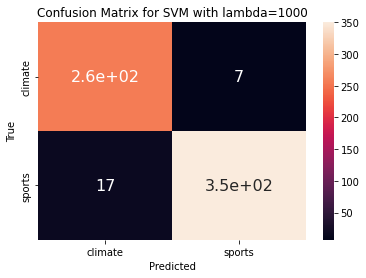

array([[256,   7],
       [ 17, 350]])

In [43]:
SVModel1000 = svm.SVC(kernel="linear", C=1000)
SVModel1000.fit(trainedRed,train["root_label"])
predSVM1000 = SVModel1000.decision_function(testRed)
ypredSVM1000 = SVModel1000.predict(testRed)
classMet1000 = classification_metrics(test["root_label"],ypredSVM1000)
print(f"Accuracy: {classMet[0]}")
print(f"Recall: {classMet[1]}")
print(f"Precision: {classMet[2]}")
print(f"F1 Score: {classMet[3]}")
plot_roc(test["root_label"],predSVM1000,title="ROC of SVM with lambda=1000")
plot_cm(test["root_label"],ypredSVM1000,['climate','sports'],"Confusion Matrix for SVM with lambda=1000")


Accuracy: 0.9603174603174603
Recall: 0.973384030418251
Precision: 0.9343065693430657
F1 Score: 0.9534450651769086
changed


/Users/ineshchakrabarti/opt/miniconda3/envs/pytorch_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


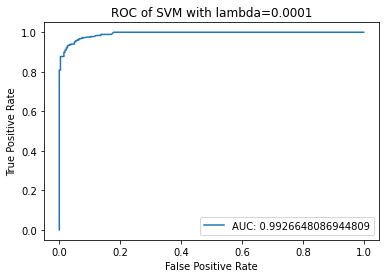

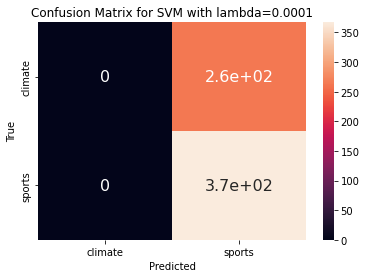

array([[  0, 263],
       [  0, 367]])

In [54]:
SVModel0001= svm.SVC(kernel="linear", C=0.0001)
SVModel0001.fit(trainedRed,train["root_label"])
predSVM0001 = SVModel0001.decision_function(testRed)
ypredSVM0001 = SVModel0001.predict(testRed)
classMet0001 = classification_metrics(test["root_label"],ypredSVM0001)
print(f"Accuracy: {classMet[0]}")
print(f"Recall: {classMet[1]}")
print(f"Precision: {classMet[2]}")
print(f"F1 Score: {classMet[3]}")
plot_roc(test["root_label"],predSVM0001,title="ROC of SVM with lambda=0.0001")
plot_cm(test["root_label"],ypredSVM0001,['climate','sports'],"Confusion Matrix for SVM with lambda=0.0001")


Accuracy: 0.9603174603174603
Recall: 0.973384030418251
Precision: 0.9343065693430657
F1 Score: 0.9534450651769086
changed


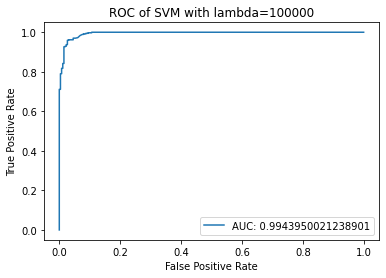

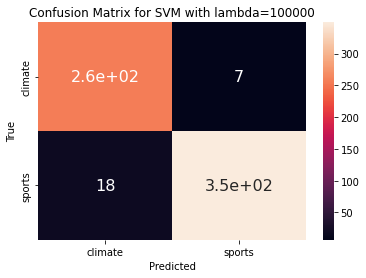

array([[256,   7],
       [ 18, 349]])

In [55]:
SVModel100000 = svm.SVC(kernel="linear", C=100000)
SVModel100000.fit(trainedRed,train["root_label"])
predSVM100000 = SVModel100000.decision_function(testRed)
ypredSVM100000 = SVModel100000.predict(testRed)
classMet = classification_metrics(test["root_label"],ypredSVM100000)
print(f"Accuracy: {classMet[0]}")
print(f"Recall: {classMet[1]}")
print(f"Precision: {classMet[2]}")
print(f"F1 Score: {classMet[3]}")
plot_roc(test["root_label"],predSVM100000,title="ROC of SVM with lambda=100000")
plot_cm(test["root_label"],ypredSVM100000,['climate','sports'],"Confusion Matrix for SVM with lambda=100000")


In [50]:
SVMmodel = svm.SVC(kernel="linear")
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000,10000,100000]}
grid_cv_svm1 = GridSearchCV(SVMmodel, param_grid, cv=5, scoring='accuracy')
grid_cv_svm1.fit(trainedRed,train["root_label"])
print("SVM Best Param:")
print(grid_cv_svm1.best_params_)

SVM Best Param:
{'C': 100000}


Question 6

Accuracy: 0.9571428571428572
Recall: 0.9315589353612167
Precision: 0.9645669291338582
F1 Score: 0.9477756286266924
changed


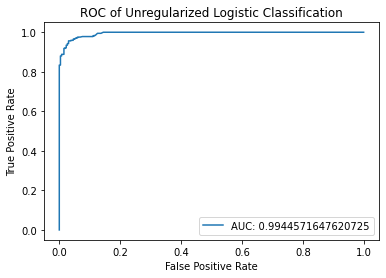

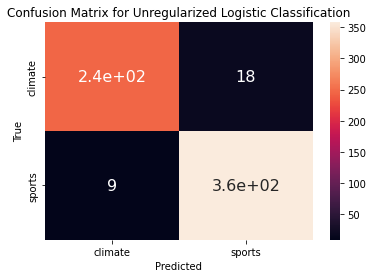

array([[245,  18],
       [  9, 358]])

In [56]:
log_model = LogisticRegression (max_iter=10000, random_state=42, tol=0.1, solver='saga')
pred_log_model = log_model.fit(trainedRed,train["root_label"]).decision_function(testRed) #replace train/test with reduced dimensionality ones
ypred_log_model = log_model.fit(trainedRed,train["root_label"]).predict(testRed)

classMet = classification_metrics(test["root_label"],ypred_log_model)
print(f"Accuracy: {classMet[0]}")
print(f"Recall: {classMet[1]}")
print(f"Precision: {classMet[2]}")
print(f"F1 Score: {classMet[3]}")
plot_roc(test["root_label"],pred_log_model,title="ROC of Unregularized Logistic Classification")
plot_cm(test["root_label"],ypred_log_model,['climate','sports'],"Confusion Matrix for Unregularized Logistic Classification")


In [57]:
log_model1 = LogisticRegression(penalty='l1',max_iter=10000, random_state=42, solver='saga')
log_model2 = LogisticRegression(penalty='l2',max_iter=10000, random_state=42, solver='saga')
param_grid = {'C':[0.001,0.01,0.1,1,10,100,250,500,1000, 2500, 5000, 10000]}

grid_cv_log1 = GridSearchCV(log_model1,param_grid,cv=5,scoring='accuracy')
grid_cv_log2 = GridSearchCV(log_model2,param_grid,cv=5,scoring='accuracy')

grid_cv_log1.fit(trainedRed,train["root_label"]) #replace train/test with reduced dimensionality ones
grid_cv_log2.fit(trainedRed,train["root_label"]) #replace train/test with reduced dimensionality ones


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42,
                                          solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 250, 500, 1000,
                               2500, 5000, 10000]},
             scoring='accuracy')

In [58]:
pred_log_model1 = grid_cv_log1.best_estimator_.decision_function(testRed) #replace train/test with reduced dimensionality ones
pred_log_model2 = grid_cv_log2.best_estimator_.decision_function(testRed) #replace train/test with reduced dimensionality ones

ypred_log_model1 = grid_cv_log1.best_estimator_.predict(testRed)
ypred_log_model2 = grid_cv_log2.best_estimator_.predict(testRed)

In [59]:
classMet = classification_metrics(test["root_label"],ypred_log_model1)
print(f"Accuracy: {classMet[0]}")
print(f"Recall: {classMet[1]}")
print(f"Precision: {classMet[2]}")
print(f"F1 Score: {classMet[3]}")

Accuracy: 0.9603174603174603
Recall: 0.973384030418251
Precision: 0.9343065693430657
F1 Score: 0.9534450651769086


In [60]:
classMet = classification_metrics(test["root_label"],ypred_log_model2)
print(f"Accuracy: {classMet[0]}")
print(f"Recall: {classMet[1]}")
print(f"Precision: {classMet[2]}")
print(f"F1 Score: {classMet[3]}")

Accuracy: 0.9650793650793651
Recall: 0.973384030418251
Precision: 0.9446494464944649
F1 Score: 0.9588014981273407


Question 7

In [61]:
GaussianModel = GaussianNB()
GaussianModel = GaussianModel.fit(trainedRed,train["root_label"])
ypredGauss = GaussianModel.predict(testRed)
predGauss = GaussianModel.predict_proba(testRed)

changed


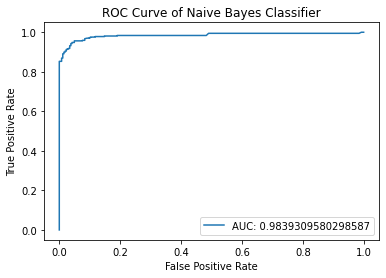

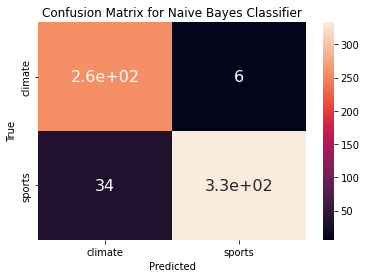

array([[257,   6],
       [ 34, 333]])

In [66]:
plot_roc(test["root_label"],predGauss[:,1], title="ROC Curve of Naive Bayes Classifier")
plot_cm(test["root_label"],ypredGauss,['climate','sports'],"Confusion Matrix for Naive Bayes Classifier")

In [62]:
classMet = classification_metrics(test["root_label"],ypredGauss)
print(f"Accuracy: {classMet[0]}")
print(f"Recall: {classMet[1]}")
print(f"Precision: {classMet[2]}")
print(f"F1 Score: {classMet[3]}")

Accuracy: 0.9365079365079365
Recall: 0.9771863117870723
Precision: 0.8831615120274914
F1 Score: 0.927797833935018


Question 9